# Home Assignment 4 in Clustering
**Goal:** Try out K-means, GMM and EM

**Grader:** Lovisa Hagström (lovhag@chalmers.se)

**Due Date:** 2022-03-20

**Submitted by:** ✏️ Anton Sandberg, 9406290677, antsandb@student.chalmers.se


---


# 📝 Submission information
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. Include your derivations for the theoretical questions. All plots/results should be visible such that the notebook does not need to be run. However, the code in the notebook should reproduce the plots/results if we choose to run it. 
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for the questions must be filled in the cells marked with "Your answer here" or ✏️. Feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer and that all plots can show on another computer, including all your writing. It is good to check if your code can run here: https://colab.research.google.com.

# 🎬🎥 Task Information

* This assignment will be about clustering movies based on features such as budget, popularity, runtime, ratings, etc. 
* The full dataset that we will use can be found in `movies_data.csv`. 
* The data was generated using the `create_data.ipynb` notebook. You don't have to read it or understand it if you don't want to, it is mostly there for your interest.
* We will stick to 2D and only analyze the `tsne_x` and `tsne_y` features in the dataset. 
    * These were obtained by applying TSNE (a method for dimensionality reduction) on seven movie features of interest (`["budget", "popularity", "release_date", "revenue", "runtime", "vote_average", "vote_count"]`).
    * More information about this process is found in `create_data.ipynb`.

The data you will work with is plotted below.

In [51]:
import pandas as pd
import altair as alt

movies_data = pd.read_csv("movies_data.csv")
movies_data.head()

,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,tsne_x,tsne_y
0,0.152630,0.026019,0.714286,0.126327,0.513699,GoldenEye,0.666667,0.097024,0.381635,-14.830027
1,0.009209,0.025806,0.714286,0.010121,0.246575,Friday,0.736842,0.041500,-6.328618,-18.786346
2,0.049998,0.027213,0.727273,0.009267,0.363014,From Dusk Till Dawn,0.719298,0.133714,-5.537369,-13.605693
3,0.005262,0.020246,0.714286,0.000457,0.191781,Blue in the Face,0.701754,0.001957,-6.789028,-19.397810
4,0.039472,0.012013,0.714286,0.023673,0.253425,Mighty Morphin Power Rangers: The Movie,0.421053,0.012148,-28.365772,2.092630


In [75]:
alt.Chart(movies_data).mark_circle(size=60).encode(
    x='tsne_x',
    y='tsne_y',
    color='vote_average',
    size='budget',
    tooltip=['title', 'vote_average', 'budget']
).properties(
    width=400,
    height=400
).interactive()

alt.Chart(...)


---

# K-Means Implementation **7 points**

### Question 1.1. **3 points**
* Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. 
* Use random points sampled uniformly without replacement from the data as initialization for the centroids. 
* Terminate the iterative procedure when the cluster assignments do not change. 
* Note that you do not need to read the data yet at this step (unless you want to do some testing).

### ✏️ Your answer here:

2
2
2
2
3
2
2
2
4
2
2
2
2
2
0
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
3
4
2
2
2
2
2
2
2
2
2
2
0
2
3
2
2
4
0
4
2
4
0
2
2
2
2
2
2
2
2
2
2
4
4
2
2
0
1
4
2
2
2
2
0
2
3
3
2
2
3
4
0
1
2
2
4
4
4
4
4
0
0
1
4
4
0
2
4
1
0
0
4
4
3
4
4
4
0
0
1
4
0
0
2
4
1
0
0
4
2
2
2
4
4
0
3
0
1
4
0
0
0
0
1
0
0
1
4
4
1
0
0
3
4
0
1
3
0
0
3
1
4
0
0
4
4
4
4
3
0
1
1
4
0
0
0
0
1
0
0
4
0
4
4
0
0
4
4
0
1
0
4
4
4
0
1
0
0
0
3
0
3
1
4
1
0
1
1
0
3
0
4
0
0
4
4
0
4
4
1
0
4
0
0
4
4
0
0
0
0
0
3
1
3
3
0
0
4
3
4
0
4
4
4
0
4
4
4
0
4
0
1
1
0
3
3
0
0
4
4
1
0
0
0
4
1
3
0
4
4
3
4
3
0
4
4
0
4
0
0
0
0
3
3
0
0
1
0
0
0
1
0
3
3
4
4
0
0
4
0
0
1
0
0
0
0
4
4
1
4
4
4
4
4
0
4
0
4
4
4
0
3
3
0
4
0
0
0
0
4
0
3
0
0
0
0
0
0
4
4
4
4
4
1
0
0
0
0
3
0
3
1
4
0
3
0
0
0
0
4
4
4
4
0
4
4
4
1
0
0
4
1
4
4
4
3
3
1
0
0
4
0
4
4
3
4
4
4
4
1
0
0
4
0
0
0
0
0
0
0
4
4
4
4
0
4
0
4
0
0
4
0
4
0
0
4
2
4
3
1
0
4
4
1
4
4
0
0
4
0
1
4
3
4
0
4
0
3
1
4
4
4
4
0
4
1
4
4
4
4
4
4
4
4
0
0
1
0
4
4
0
3
0
0
4
0
4
4
4
0
4
4
1
3
4
3
1
1
3
3
4
0
1
0
4
0
0
0
3
4
4
4
0
0
4
4
0
0
0
1
0
3
0


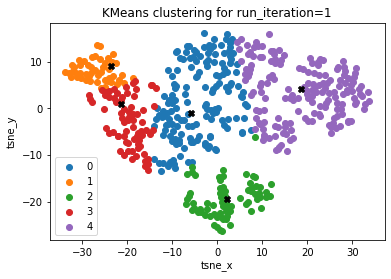

0
0
0
0
4
0
2
0
2
2
0
0
2
1
1
1
4
0
0
0
0
0
0
2
0
0
2
0
0
0
0
2
0
0
2
0
4
1
0
0
0
0
0
0
0
0
0
0
1
0
4
0
0
3
1
3
0
3
4
0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
4
1
0
0
0
0
0
0
4
4
0
0
4
2
1
4
0
0
2
3
2
3
2
0
1
4
3
3
1
2
3
1
1
0
1
3
4
2
2
3
1
1
4
2
1
0
0
3
4
1
0
3
0
0
0
3
3
0
4
2
1
2
1
1
1
1
4
1
1
4
3
3
4
0
1
4
3
0
4
4
4
1
4
4
3
0
1
3
3
3
3
4
1
1
4
3
1
0
0
1
4
0
1
1
4
2
3
1
0
3
3
1
1
0
1
3
3
2
4
1
1
0
4
0
4
1
1
4
0
4
4
1
4
0
3
0
0
3
3
1
3
1
4
1
1
1
1
3
3
1
1
1
1
0
4
4
4
4
4
1
1
4
3
1
3
1
2
4
3
3
3
0
3
1
4
4
1
4
4
1
1
3
3
1
1
0
0
3
4
4
1
3
1
4
3
4
1
3
3
1
2
1
1
0
1
4
4
0
0
4
1
0
1
4
4
4
4
3
3
0
0
3
1
1
4
0
0
0
1
3
3
4
3
3
2
3
3
1
3
1
3
3
3
1
4
4
0
2
1
0
0
0
3
1
4
1
0
1
4
1
1
3
3
1
3
3
1
0
0
1
0
4
1
4
4
2
1
4
1
0
0
0
3
3
3
2
4
3
3
3
4
1
1
3
4
3
3
1
4
4
4
1
1
3
1
3
3
4
3
3
3
2
4
0
1
3
1
1
1
2
1
1
0
3
3
3
3
1
3
0
2
1
1
3
1
3
1
1
3
0
3
4
4
2
3
3
1
3
3
1
0
1
1
4
2
4
2
0
3
0
4
4
3
2
3
3
1
3
4
3
3
3
3
3
3
3
3
0
1
1
0
3
3
4
4
0
1
3
1
3
3
3
1
3
3
4
4
3
4
4
1
4
4
3
1
4
1
3
1
1
1
4
3
3
2
1
1
3
1
4
1
0
4
1
4
1


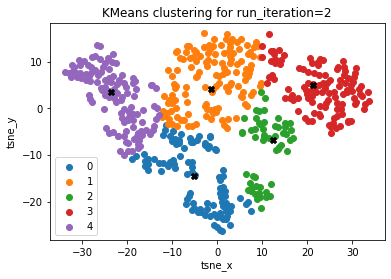

2
2
2
1
0
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
4
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
4
2
4
2
4
1
2
2
2
2
2
2
2
2
2
1
4
2
2
2
2
3
4
2
2
2
2
1
1
0
1
2
2
1
2
3
3
2
2
2
4
2
4
2
2
2
3
4
4
2
2
4
3
2
1
4
4
0
4
2
4
2
2
3
2
3
1
2
4
3
2
0
4
2
2
2
4
4
1
0
2
3
2
4
2
0
4
3
2
2
3
4
4
3
1
2
0
4
1
3
0
1
0
0
3
4
0
2
4
4
4
4
0
3
3
3
4
3
0
0
2
3
0
2
4
0
2
4
0
0
4
4
2
3
0
4
4
4
2
3
0
3
0
0
0
0
3
4
3
1
3
3
3
0
0
4
0
0
4
4
0
4
4
3
2
4
2
0
4
4
2
0
2
2
0
3
3
0
0
0
2
4
0
4
2
4
4
2
0
4
4
4
0
4
0
3
3
3
0
0
0
4
4
4
3
2
0
0
4
3
0
0
4
4
0
4
3
0
4
4
4
2
3
0
0
4
0
0
0
0
3
3
1
0
3
0
0
0
4
4
0
0
4
3
3
3
0
0
0
0
4
4
3
4
4
4
4
4
0
4
0
4
4
4
3
0
0
0
2
3
0
0
0
4
0
0
0
0
4
0
3
4
4
4
4
4
4
3
0
0
3
0
0
3
0
3
2
4
0
3
0
0
0
4
4
4
2
0
4
4
4
3
2
3
4
3
4
4
2
3
0
3
0
4
4
2
4
4
0
4
4
4
2
3
1
2
4
3
3
3
2
3
0
0
4
4
4
4
0
4
1
2
4
4
4
2
4
0
3
4
1
4
0
3
2
4
4
3
4
4
3
0
4
3
3
2
0
2
0
4
0
0
3
4
2
4
4
3
4
3
4
4
4
4
4
4
4
4
0
2
3
0
4
4
1
3
1
0
4
4
4
4
4
0
4
4
3
0
4
0
3
3
0
3
4
2
3
3
4
0
3
4
3
4
4
2
4
2
4
4
0
3
0
3
3
0
3


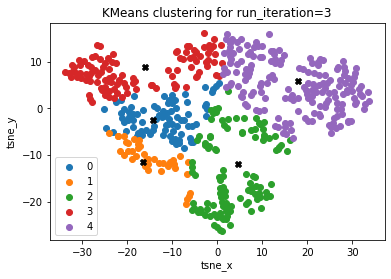

4
4
4
4
3
4
4
4
0
4
4
4
4
4
1
4
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
3
1
4
4
4
4
4
4
4
4
4
4
1
4
3
4
4
2
1
0
4
1
3
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
3
1
4
4
4
4
3
4
3
3
4
4
3
1
3
3
4
4
0
2
1
2
1
4
3
3
0
0
3
1
1
3
3
4
1
2
3
1
0
2
3
1
3
1
3
3
4
2
3
1
4
1
4
4
4
1
0
4
3
1
3
0
1
3
3
1
3
1
1
3
0
0
3
3
3
3
0
3
3
3
3
3
3
3
1
3
3
1
0
1
0
3
3
3
3
0
3
3
3
3
3
3
3
3
3
1
0
3
4
1
0
1
3
3
3
0
0
1
3
3
3
3
3
4
3
3
1
3
3
3
3
3
3
3
2
3
3
2
1
3
1
1
3
3
3
3
3
1
1
3
3
3
1
4
3
3
3
3
3
3
1
3
1
3
1
3
1
3
0
1
0
3
1
3
3
3
3
3
3
3
3
2
0
3
3
3
3
0
3
3
3
0
3
3
0
3
3
0
1
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
0
3
3
1
3
3
3
3
3
3
3
1
0
3
0
0
1
1
0
3
0
3
1
0
0
3
3
3
3
1
3
3
3
3
2
3
3
3
3
3
3
3
3
2
2
3
0
0
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
0
1
0
1
3
0
1
0
3
1
3
1
3
0
2
1
3
3
3
3
3
1
3
2
0
3
0
0
0
0
3
3
1
1
3
3
3
1
3
3
3
0
0
0
0
3
0
3
1
3
3
0
3
0
3
3
0
4
0
3
3
1
0
0
3
0
2
3
3
3
3
3
1
3
1
3
0
3
3
3
2
1
0
0
3
1
3
2
2
0
0
2
0
0
0
3
3
3
3
1
0
3
3
3
3
0
3
0
1
3
3
0
0
3
3
0
3
3
3
3
3
0
1
3
3
1
3
3
3
3
0
1
1
3
1
3
3
3
3
3
3
3
3
3


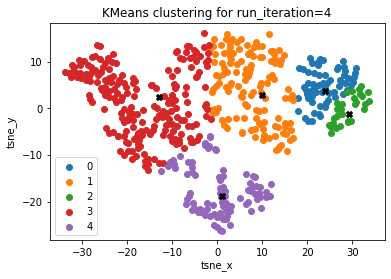

2
2
3
2
0
2
2
2
4
2
2
2
2
2
4
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
0
1
2
2
2
2
2
2
2
2
2
2
3
2
0
2
2
4
4
4
2
1
0
2
2
2
2
2
2
2
2
2
2
1
4
2
3
3
0
1
2
2
2
2
0
2
0
0
2
2
0
4
3
0
2
2
4
4
4
4
4
3
3
0
4
4
3
4
1
0
3
0
1
4
0
4
4
4
3
3
0
4
3
0
2
4
0
3
3
1
2
2
2
1
4
0
0
4
0
4
1
3
3
1
0
3
4
0
4
4
0
0
3
0
4
0
0
0
0
3
0
0
1
0
3
1
4
4
4
0
3
0
0
4
1
0
0
3
0
0
3
1
0
4
4
3
3
1
4
4
0
3
1
4
4
4
0
0
0
3
0
3
0
0
1
0
0
0
0
0
0
3
4
3
0
4
1
3
1
4
0
3
1
3
0
1
1
3
0
3
3
3
0
0
0
0
0
3
1
0
4
3
1
1
4
0
4
1
4
0
1
0
0
0
3
0
0
0
3
4
4
0
3
0
0
1
0
0
0
1
1
0
4
0
3
1
1
1
4
1
0
3
1
0
0
0
3
0
0
0
3
0
0
0
0
4
1
0
0
1
1
0
0
3
0
0
0
1
4
0
4
4
4
1
4
3
4
3
1
4
4
1
0
0
0
4
0
0
0
0
4
0
0
0
0
1
0
1
1
4
4
1
4
4
1
3
0
3
0
0
1
0
0
4
1
0
3
3
3
3
1
1
4
4
0
4
1
4
0
4
3
1
0
1
4
4
0
0
0
3
1
1
3
4
4
0
4
4
4
4
0
0
4
4
3
1
1
4
1
3
0
4
4
4
1
3
4
0
4
1
1
4
3
4
0
1
4
2
4
0
0
4
1
4
0
4
4
1
3
1
3
0
4
0
4
0
4
3
0
0
4
4
4
4
3
1
0
4
4
4
4
4
4
4
4
0
3
1
0
4
4
0
0
0
3
4
1
4
1
1
3
4
4
0
0
4
0
0
1
0
0
4
4
0
0
1
0
3
1
0
1
1
4
1
4
1
1
0
1
0
0
3
0
3


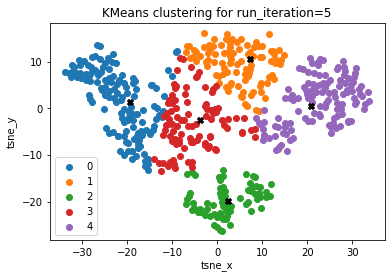

In [81]:
import numpy as np
from collections import Counter, defaultdict
import random
import seaborn as sns
import matplotlib.pyplot as plt

# If we're not allowed to use KMeans

def initialize_clusters(params1, params2, n_of_clusters, centroids):
    clusters = [[] for i in range(n_of_clusters)]
    for data in zip(params1, params2):
        distances = []
        for k in range(n_of_clusters):
            euc_dist = np.sqrt((data[0]-centroids[k,0])**2+(data[1]-centroids[k,1])**2)
            distances.append(euc_dist)
            
        # Check which index the minimum distance have in the list
        # and assign that value as "label"
        min_index = int(distances.index(min(distances)))
        print(min_index)
        clusters[min_index].append(list(data))
    return clusters
 
    
def update_clusters(params1, params2, n_of_clusters, centroids):
    clusters = [[] for i in range(n_of_clusters)]
    for data in zip(params1, params2):
        distances = []
        for k in range(n_of_clusters):
            
            euc_dist = np.sqrt((data[0]-centroids[k,0])**2+(data[1]-centroids[k,1])**2)
            distances.append(euc_dist)
        min_index = distances.index(min(distances))
        clusters[min_index].append(list(data))
    return clusters
  
    
def initialize_centroids(params1, params2, n_of_clusters):
    centroids = np.zeros((n_of_clusters, 2))
    for i in range(n_of_clusters):
        
        r1 = np.random.choice(params1, 5, replace=False)
        r2 = np.random.choice(params2, 5, replace=False)
        centroids[:, 0] = r1
        centroids[:, 1] = r2
    return centroids
    

def update_centroids(n_of_clusters, clusters, centroids):
    for i in range(n_of_clusters):
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

    
n_of_clusters = 5
param1 = 'tsne_x'
param2 = 'tsne_y'
params1 = movies_data[param1]
params2 = movies_data[param2]


# 5 times 
for run_iteration in range(1,6):
    iterations = 0

    centroids = initialize_centroids(params1, params2, n_of_clusters)
    clusters = initialize_clusters(params1, params2, n_of_clusters, centroids)
    keep_going = True   
    while keep_going:
        iterations += 1
        new_centroids = update_centroids(n_of_clusters, clusters, centroids)
        clusters = update_clusters(params1, params2, n_of_clusters, centroids)
        
        euc_dist = []
        
        for i in range(n_of_clusters):
            print(centroids[i])
            print(new_centroids[i])
            dist = np.sqrt((centroids[i,0]-new_centroids[i,0])**2+(centroids[i,1]-new_centroids[i,1])**2)
            euc_dist.append(dist)
            
        sum_distances = np.sum(euc_dist)
        if sum_distances <= 0.1:
            print(f'{iterations=}')
            keep_going = False
            
        
        centroids = new_centroids
        

    for i in range(n_of_clusters):
        plt.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1], label=f'{i}')
        plt.scatter(np.array(centroids[i])[0], np.array(centroids[i])[1], marker='X', color='black')

    plt.title(f'KMeans clustering for {run_iteration=}')
    plt.xlabel(R'tsne_x')
    plt.ylabel(R'tsne_y')
    plt.legend()
    plt.show()


    

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer


# If we're allowed to use KMeans (which i assume we aren't)

model = KMeans()
param1 = 'tsne_x'
param2 = 'tsne_y'
df = pd.DataFrame(movies_data, columns=[param1, param2])
kmeans = KMeans(n_clusters=5, init='random', random_state=0).fit(df)




model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

sns.scatterplot(data=df, x=param1, y=param2, hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.title(f'KMeans clustering with sklearn')
plt.show()

ModuleNotFoundError: No module named 'yellowbrick'

### Question 1.2. **2 points**
In this exercise you will run your $k$-means algorithm implementation on the data in `movies_data.csv`. Each row in the data describes a movie, and each column is a feature. Remember that you only should run the algorithm on the `tsne_x` and `tsne_y` features.

1. What value of $k$ do you think is suitable for this data?

2. Run your k-means implementation on the data with your choice of suitable $k$. Run the algorithm 5 times on the data and plot the resulting cluster assignments for each run. Also note for each run how many iterations were required before convergence. 

3. Do you always get the same final cluster solutions and same number of required iterations? Why/why not?

### ✏️ Your answer here:

### Question 1.3. **2 points**

* We will now estimate a good value for the number of clusters $k$ for our data using the intra-cluster variance $W=\sum_k W_k$, where $W_k = \frac{1}{|C_k|} \sum_{x\in C_k}(x-\mu_k)^2$.
* Plot the intra-cluster variance of your clustering solutions for $k \in [1,...,10]$.
* What $k$ seems to be most suitable, based on the intra-cluster variance plot?
* Run your k-means clustering algorithm one last time with the optimal $k$ found and plot the result.
    * Do the clusters make sense?

### ✏️ Your answer here:

C:\Users\anton\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\anton\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


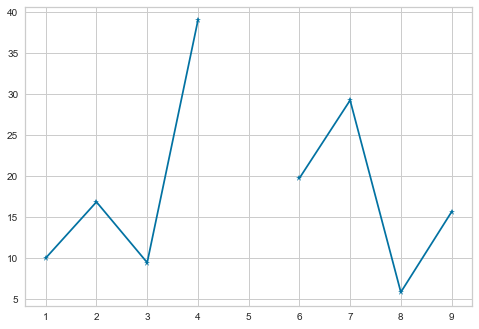

In [32]:
for k in range(1, 10):
    n_of_clusters = k
    centroids = dict()
    for i in range(n_of_clusters):
        # Not sure if this is the best random function to use but seemed the most intuitive
        r1 = np.random.uniform(min(movies_data[param1]), max(movies_data[param1]))
        r2 = np.random.uniform(min(movies_data[param2]), max(movies_data[param2]))
        centroids[i] = [r1, r2]

    clusters = initialize_clusters(k)
      
    for _ in range(3):
        clusters = update_clusters(params1, params2, centroids, n_of_clusters)
        centroids = update_centroids(clusters, centroids, n_of_clusters)
    
    Ws = []
    for i in range(n_of_clusters):
        W_k = 1/np.linalg.norm(clusters[i])*np.sum((np.array(clusters[i]) - np.array(centroids[i]))**2)
        Ws.append(W_k)

plt.plot(list(range(1, len(Ws)+1)), Ws, '-*')

# GMM **2 points**

We will now consider a mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

### Question 2.1. **1 point**
Plot the probability distribution $p(x)$ for the following parameter values.

$D = 1$,

$K = 2$,

$\pi_1 = \pi_2 = 0.5$,

$\mu_1 = -2$,

$\mu_2 = 5$, 

$\Sigma_1 = 3$,

$\Sigma_2 = 5$. 

### ✏️ Your answer here:

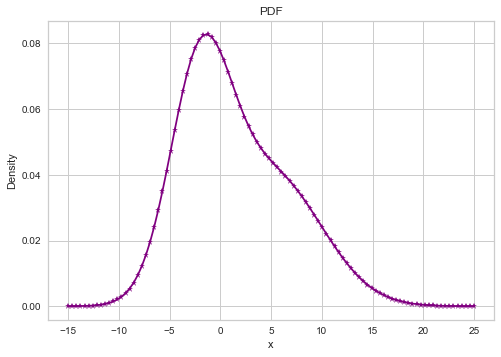

In [39]:
import matplotlib.pyplot as plt
import numpy as np

D = 1
K = 2
pies = [0.5, 0.5]
mues = [-2, 5]
sigma = [3, 5]

xs = np.linspace(-15,25, 100)
ys = np.zeros(len(xs))
for j, x in enumerate(xs):
    prob = 0
    for i in range(2):
        prob += pies[i]/(sigma[i]*np.sqrt(2*np.pi))*np.exp(-1/2*(((x-mues[i])/sigma[i])**2))
    ys[j] = prob
plt.plot(xs, ys, '-*', color='purple')
plt.title('PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

### Question 2.2. **1 point**

What is the posterior probability that an example $x=1.5$ was produced by the Gaussian $k=1$, i.e. $P(\theta_1| x)$ ?

### ✏️ Your answer here:

In [41]:
    x = 1.5
    prob = pies[0]/(sigma[0]*np.sqrt(2*np.pi))*np.exp(-1/2*(((x-mues[0])/sigma[0])**2))
    y = prob
    print(y)

0.03366644759234315


# EM algorithm for GMM **5 points**

The data used for this assignment will be one-dimensional and given by the `tsne_y` column from the `movies_data.csv`. 

### Question 3.1. **1 point**

* For this assignment we assume that the data distribution can be described by a mixture of 2 Gaussians in one dimension, of respective parameters $(\mu_1, \sigma_1^2)$ and $(\mu_2, \sigma_2^2)$. 
* Do you think that this is a reasonable assumption to make? Please motivate your answer.

### ✏️ Your answer here:

### Question 3.2. **2 points**

* We will call $\pi_1$ and $\pi_2$ the coefficients of the two Gaussians in the mixture.
* Sort the items of the sample in ascending order and use the 300 smallest values for estimating $(\mu_1, \sigma_1^2)$ and the remaining larger ones to estimate $(\mu_2, \sigma_2^2)$. 
* Under these conditions, what values should logically be assigned to the weights $\pi_1$ and $\pi_2$? 
* Plot the resulting distribution of the mixture model for this initializing step.

### ✏️ Your answer here:

### Question 3.3. **2 points**

* Starting from $\theta^0 = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}$ obtained from the previous question, estimate the value of responsibilities $\gamma(z_{nk})$ according to the EM algorithm. 
* Plot the values, with the gamma values on the y axis and the data values on the x axis.


### ✏️ Your answer here: